### SVM 

Support Vector Machine (SVM) is a powerful classification machine learning algorithm.

Considering samples $D=\{(x_1, y_1), (x_2, y_2),..., (x_m, y_m)\}$,
Sample space can be divided by such hyperplane $w
^Tx+b=0$ where $w = (w_1; w_2; ...; w_d)$ is the normal vector, which decides the direction of the hyperplane, and $b$ is the intercept. 

The distance between any point $x$ in the sample space to the hyperplane is
$$r = \frac{|w^Tx+b|}{||w||}$$


Suppose the hyperplane $(w,b)$ can classify the training samples correctly, i.e. for $(x_i,y_i) \in D$, if $y_i=+1$ then we have $w^Tx_i+b > 0$. If $y_i=-1$ then $w^Tx_i +b <0$

Let $$\left\{
         \begin{array}{ll}
           w^Tx_i+b \geq +1, & y_i=+1\\
           w^Tx_i+b \leq -1, & y_i=-1
                \end{array}
              \right.$$
Such hyperplane always exists, since we just need to do the linear transformation as $w \rightarrow \zeta w$ and $b \rightarrow \zeta b$ pro rata.

So the closest distance of points from 2 different classes is $\gamma = \frac{2}{||w||}$, we call it **margin**.

$$\left\{
         \begin{array}{ll}
           max_{w,b} & \gamma = \frac{2}{||w||}\\
           s.t. & y_i(w^Tx_i+b) \geq 1, & i=1,2,...,m
                \end{array}
              \right.$$

Which is equivalent to 
              
$$\left\{
         \begin{array}{ll}
           min_{w,b} &  \gamma = \frac{1}{2}||w||^2\\
           s.t. & y_i(w^Tx_i+b) \geq 1, & i=1,2,...,m
                \end{array}
              \right.$$
              
And this is the classical **Support Vector Machine (SVM)** model.

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os, sys


from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings(action="ignore")

/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
## Generate random datasample with random targets
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

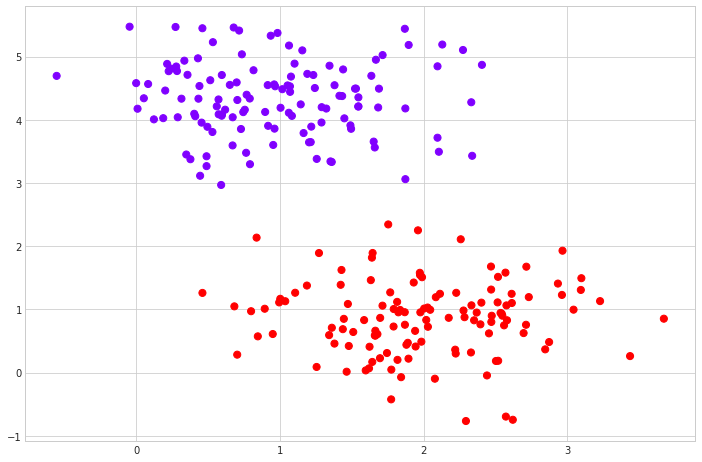

In [3]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Try to seperate the dataset into 2 parts with linear boundary:

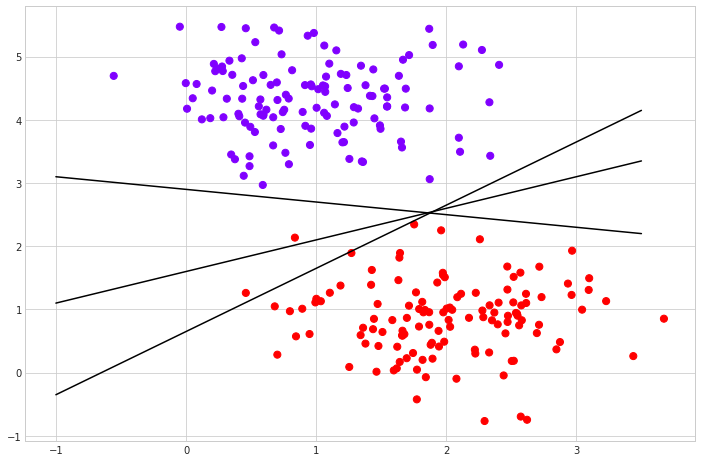

In [4]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
xfit = np.linspace(-1, 3.5)
for slope, intercept in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    ax.plot(xfit, slope* xfit + intercept, '-k')

But what's the best separation?

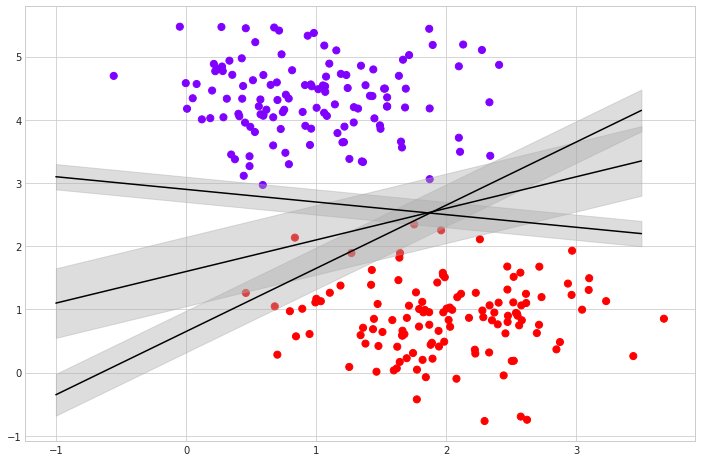

In [5]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
xfit = np.linspace(-1, 3.5)
for slope, intercept, width in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = slope* xfit + intercept
    ax.plot(xfit, yfit, '-k')
    ax.fill_between(xfit, yfit - width, yfit + width, edgecolor='none', color='#AAAAAA', alpha=0.4)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC

class SVMClf(object):

    def __init__(self, X, y, linear=False,**kwargs):
        
        self.X = X ## X as data
        self.y = y ## y as target
        ## kernal and C are model specific in SVM
        self.linear = linear
        if self.linear == True:
            self.model = LinearSVC(**kwargs)
        else:
            self.model = SVC(**kwargs)

        self.lowerBound = np.min(X) - 0.2*np.std(X)
        self.upperBound = np.max(X) + 0.2*np.std(X)
        self.new_X = np.linspace(self.lowerBound, self.upperBound, 500)




    def train_model(self):
        self.model.fit(self.X, self.y)
        self.trained = True

    def get_parameters(self, model=None):



    
        self.support_vectors = self.model.support_vectors_
        self.w = self.model.coef_[0]
        self.b = self.model.intercept_[0]
        
        self.decision_boundary = -self.w[0]/self.w[1] * self.new_X - self.b/self.w[1]

        self.margin = 1/self.w[1]
        self.gutter_up   = self.decision_boundary + self.margin
        self.gutter_down = self.decision_boundary - self.margin



    def model_predict(self, new_data):

        return self.model.predict(new_data)

    def plot_model(self):
        self.fig = plt.figure(figsize = (12,8))
        self.ax = plt.axes()

        if self.trained == True:
            self.ax.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='rainbow', alpha=0.5)
            self.ax.scatter(self.support_vectors[:,0], self.support_vectors[:,1], s = 100, \
                            facecolors='b')

    def plot_model_boundary(self):
        self.fig = plt.figure(figsize = (12,8))
        self.ax = plt.axes()

        if self.trained == True:
            self.ax.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='rainbow', alpha=0.5)
            self.ax.scatter(self.support_vectors[:,0], self.support_vectors[:,1], s = 100,\
                            facecolors='b')
            self.ax.plot(self.new_X, self.decision_boundary, "r-.", linewidth = 2)
            self.ax.plot(self.new_X, self.gutter_up, "g--", linewidth = 2)
            self.ax.plot(self.new_X, self.gutter_down, "g--", linewidth = 2)


    @staticmethod
    def plot_given_model(input_model, xmin, xmax):
        w = input_model.coef_[0]
        b = input_model.intercept_[0]

        # At the decision boundary, w0*x0 + w1*x1 + b = 0
        # => x1 = -w0/w1 * x0 - b/w1
        x0 = np.linspace(xmin, xmax, 200)
        decision_boundary = -w[0]/w[1] * x0 - b/w[1]
        
        ## how to calculate SVM Margin?
        margin = 1/w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin

        svs = input_model.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=250, facecolors='#FFAAAA')
        plt.plot(x0, decision_boundary, "r-.", linewidth=2)
        plt.plot(x0, gutter_up, "k--", linewidth=2)
        plt.plot(x0, gutter_down, "k--", linewidth=2)
    
    
    @staticmethod
    def plot_dataset(X, y , limits=None):
      
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "k^")
        plt.xlabel(r"$x_1$", fontsize = 20)
        plt.ylabel(r"$x_2$", fontsize = 20, rotation=0)
        if limits!=None:
            plt.axis(limits)

    @staticmethod
    def plot_predictions(model, limits):

        x0s = np.linspace(limits[0], limits[1], 100)
        x1s = np.linspace(limits[2], limits[3], 100)
        x0, x1 = np.meshgrid(x0s, x1s)
        X = np.c_[x0.ravel(), x1.ravel()]
        y_pred = model.predict(X).reshape(x0.shape)
        y_decision = model.decision_function(X).reshape(x0.shape)
        
        plt.contourf(x0, x1, y_pred, cmap="rainbow", alpha=0.2)
        plt.contourf(x0, x1, y_decision, cmap="rainbow", alpha=0.1)
        
    @staticmethod
    def plot_svc_decision_function(model, ax=None, plot_support=True):
        """Plot the decision function for a 2D SVC"""
        if ax is None:
            ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        # create grid to evaluate model
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)
        
        # plot decision boundary and margins
        ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
        
        # plot support vectors
        if plot_support:
            ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)


In [7]:
svmclf = SVMClf(X,y, C = 100, kernel= "linear")

In [8]:
svmclf.train_model()
svmclf.get_parameters()

In [9]:
support_vectors = svmclf.support_vectors
support_vectors

array([[1.87296081, 3.06179631],
       [0.59009904, 2.96974544],
       [1.7535775 , 2.34513587]])

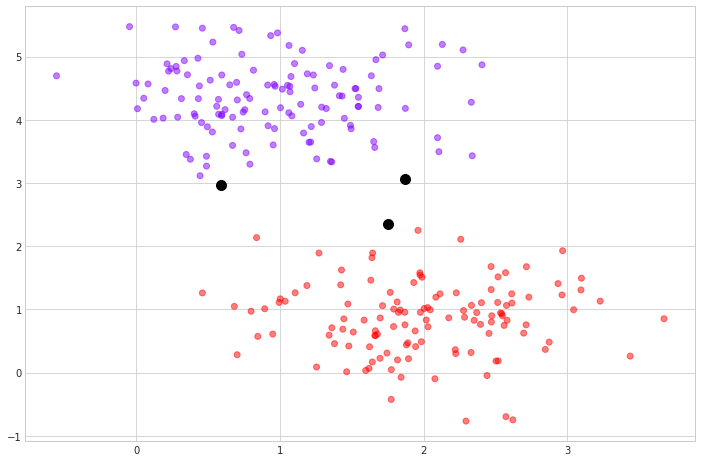

In [10]:
svmclf.plot_model()

In [11]:
svmclf.upperBound

5.777529548044226

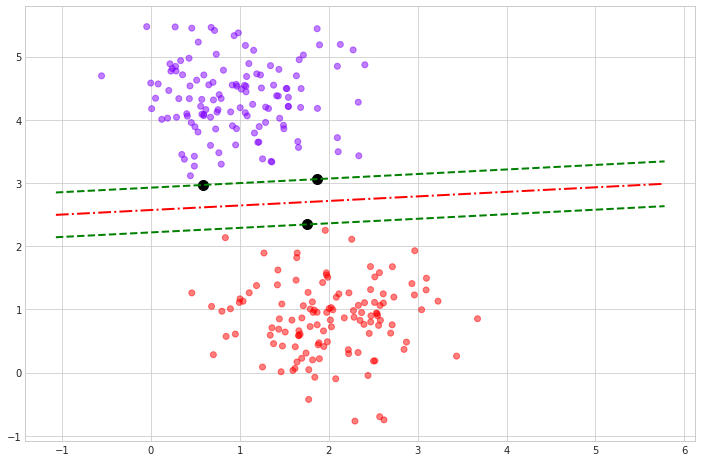

In [12]:
svmclf.plot_model_boundary()


#### SVM is sensitive to scaling

In [13]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svmclf2 = SVMClf(Xs, ys, C=100, kernel = 'linear')

In [14]:
svmclf2.train_model()
svmclf2.get_parameters()

array([[ 1., 50.],
       [ 5., 60.]])

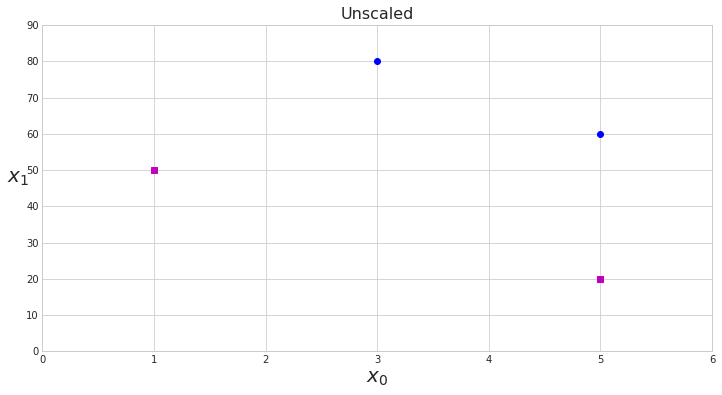

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 6))
# plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

svm_clf.support_vectors_

In [16]:
svmclf2.support_vectors

array([[ 1., 50.],
       [ 5., 60.]])

Unscaled data has 2 support vectors

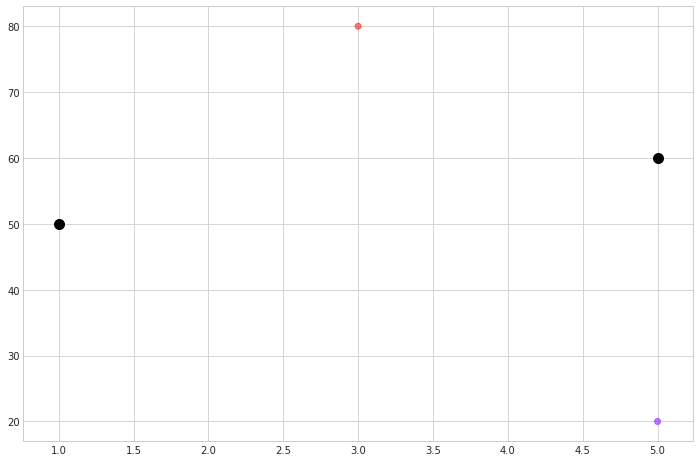

In [17]:
svmclf2.plot_model()

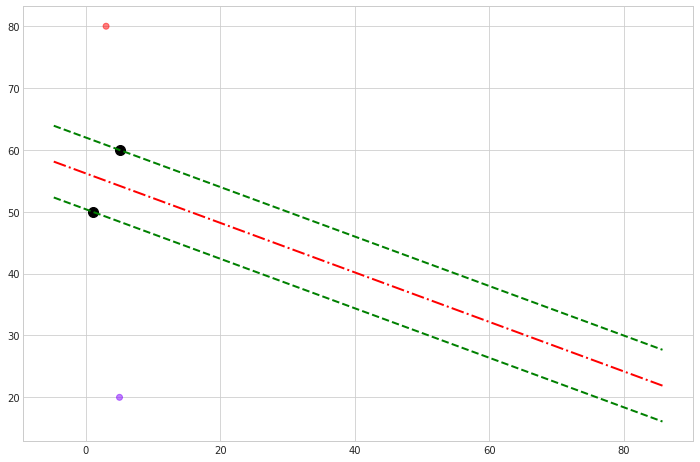

In [18]:
svmclf2.plot_model_boundary()

Scaled data has 3 support vectors

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

svmclf3 = SVMClf(X_scaled, ys, C=100, kernel='linear')
svmclf3.train_model()
svmclf3.get_parameters()

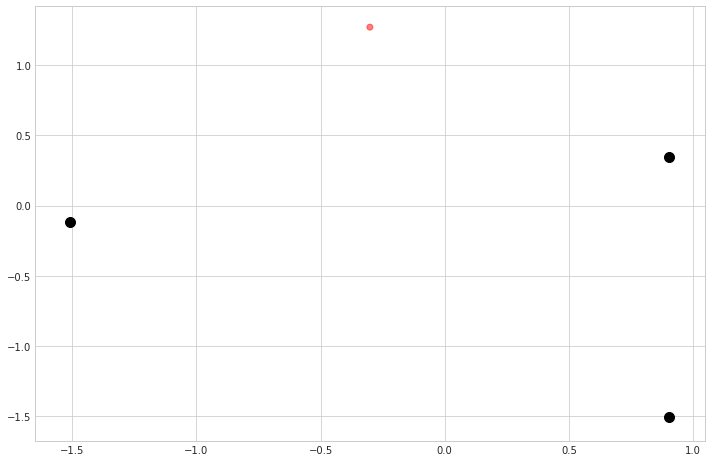

In [20]:
svmclf3.plot_model()

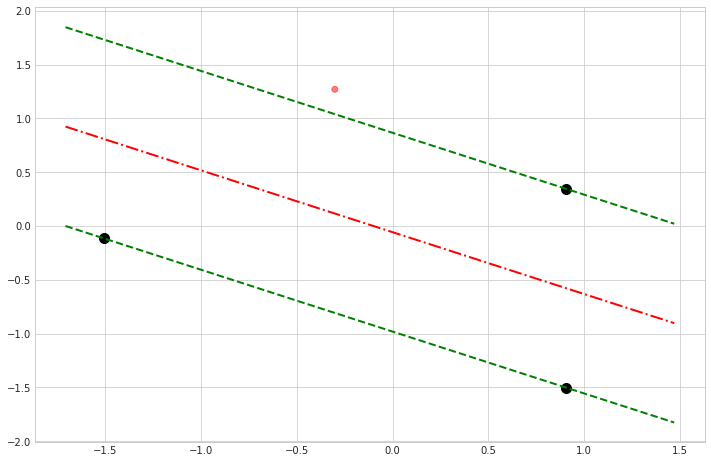

In [21]:
svmclf3.plot_model_boundary()

## Soft Margin Classification

If we insist that all instances are perfectly separated by the boundary and off the street, it is called *hard margin classification* where *hard* means the hard restriction or *hard* rule.

There are some problems here: 
1. What if the whole dataset is not linearly separable? And we cannot find such a boundary?
2. What if there are some outliers?

Text(0.5, 1.0, 'Outlier')

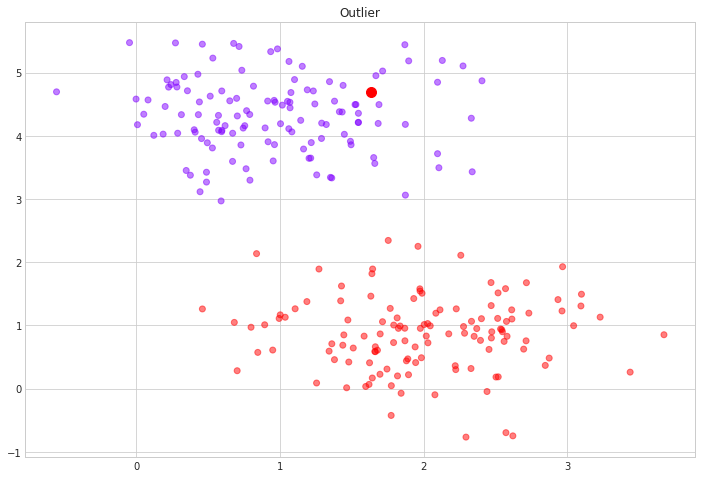

In [22]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', alpha=0.5)
ax.scatter(X[:, 0][8],X[:,1][8],  s=100, facecolors='r')
ax.set_title('Outlier')

To avoid this we need to come up with some more flexible models. The general idea is similar to what we have done in linear model when we are adding the penalty term for regularization: we need to reach a balance between the model complexity and the fitness. By allowing limited margin violations, we can build a *slack* support vector machine with *soft margin*.

For some limited points we would allow:
$$y_i(w^Tx_i +b)\geq 1$$
But still need to make the total number of such points as less as possible when we are maximizing the margin.

And the objective function now can be :

$$min_{w,b} \frac{1}{2}||w||^2 + C\sum_{i=1}^msign(y_i(w^Tx_i +b)-1)$$

Where C is a constant hyper-parameter and $$sign()$$ is sign function or a "0/1" Loss function like this:

$$sign(x) = \left   \{
         \begin{array}{ll}
          1& x\leq 0\\
           0 & x >0
                \end{array}
              \right.$$
              
So here C is like $\alpha$ in LASSO or Ridge, is the hyper-parameter controlling the generalization of the model. If C goes to positive infinite, it forces all the samples to satisfy the constraint, and the model will be the same as *hard margin*. And if C is not significantly large, it will allow some points to violate the margin constraint.

However the $sign$ function is not smooth enough for taking the derivatives, and sometimes we would use such form of hinge loss $l_{hinge}(x) = max(0, 1-x)$, which is smooth around 0:
$$min_{w,b} \frac{1}{2}||w||^2 + C\sum_{i=1}^mmax(0, 1- y_i(w^Tx_i +b))$$

Again we use 

In [23]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica


In [24]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [25]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

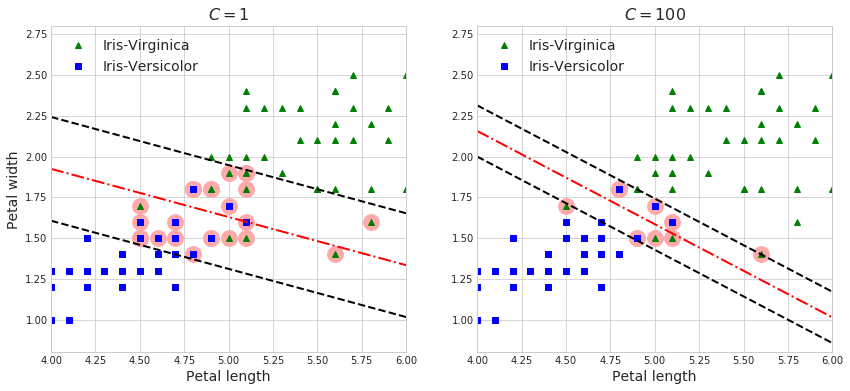

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
SVMClf.plot_given_model(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
SVMClf.plot_given_model(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16);
plt.axis([4, 6, 0.8, 2.8])



### Kernel tricks

#### Basis Functions
When the boundary is no longer linear, or not even close to a linear shape, we need to apply kernel tricks to map the original datasets to a kernal space, in which the image of the projection is linear separable.

Let's remind us of the basis regression when we are talking about linear models. By applying a whole series of functions $f_n()$ to our data point $x$, we can project our original data into another space generated by $\{f_1, f_2, ..., f_n\}$.

In SVM we can apply kernel trick to project original dataset, which is hard to separate linearly into another space where they can be separate linearly easily.


For example:

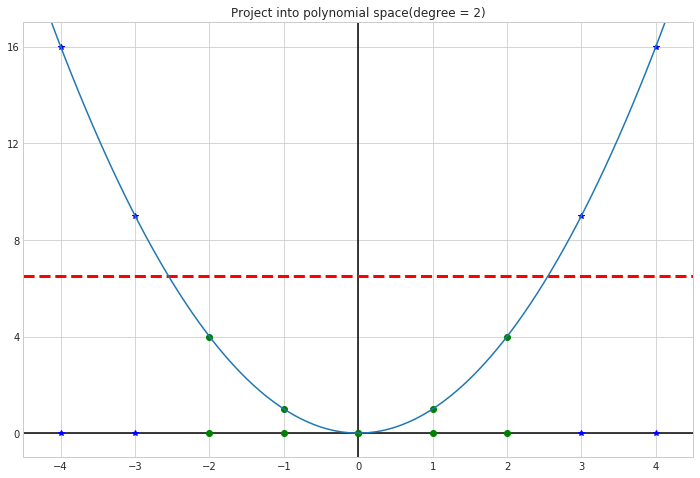

In [27]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()


ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "b*")
ax.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "go")
ax.plot(X1D[:, 0][y==0], np.zeros(4), "b*")
ax.plot(X1D[:, 0][y==1], np.zeros(5), "go")
fig.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
ax.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
ax.axis([-4.5, 4.5, -1, 17])

x_line = np.linspace(-4.5, 4.5, 100)
y_line = x_line* x_line
ax.plot(x_line, y_line)
ax.set_title('Project into polynomial space(degree = 2)');




The moon-shape dataset:

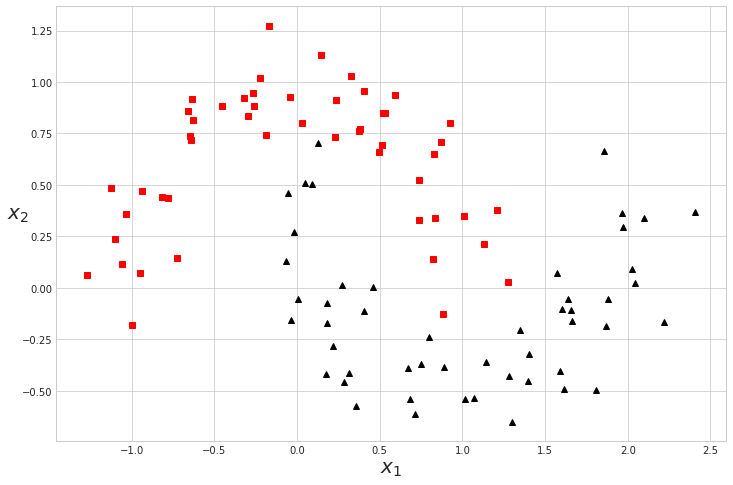

In [79]:
from sklearn.datasets import make_moons
## make moons is a classical data generation function for generating moon-shape dataset,
## which gap is not linear
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.figure(figsize=(12, 8))
SVMClf.plot_dataset(X,y)

In [80]:
svm_linear_moon =  SVMClf(X, y, C=100, kernel='linear')
svm_linear_moon.train_model()
svm_linear_moon.get_parameters()

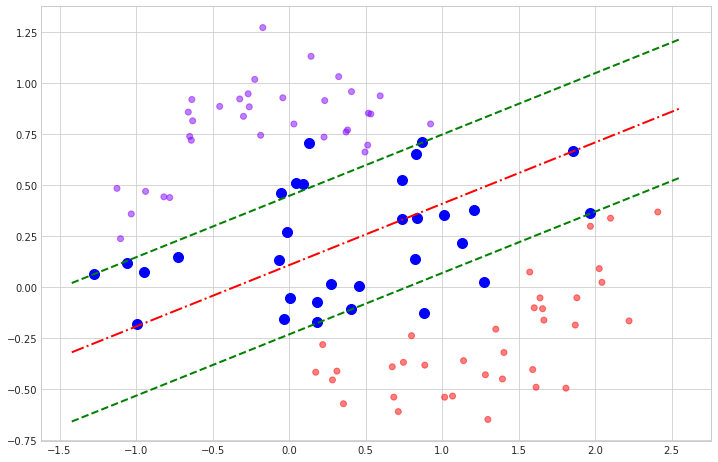

In [81]:
svm_linear_moon.plot_model_boundary()

Applying polynomial features:

In [82]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])


polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

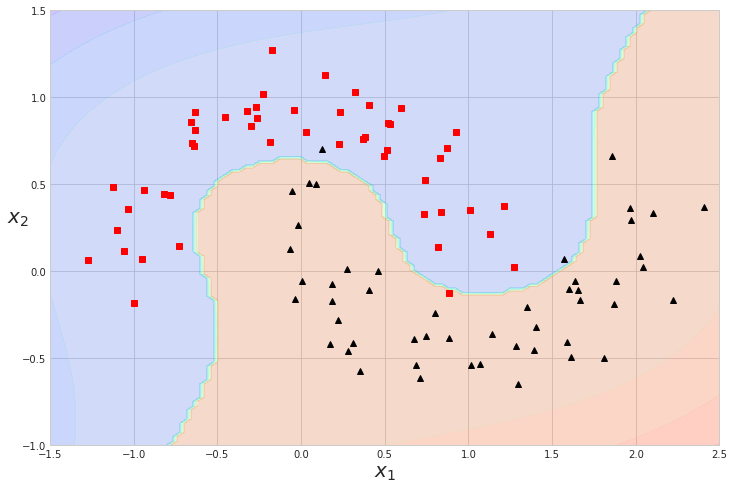

In [83]:
plt.figure(figsize=(12, 8))
SVMClf.plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
SVMClf.plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


#### Equivalent Kernels
Except adding polynomial features, we can apply kernel methods/tricks directly to our SVM model to get equivalent results:

The essence of kernel tricks is projecting the original data from one space to a higher dimensional space.

Use $\phi(x)$ to represent the projected vectors of $x$. So in the projected space the linear separable model can be written as: $$f(x) = w^T\phi(x) + b$$

Where $w$ and $b$ is the model parameter. Similar to previous model, we can change from 

$$\left\{
         \begin{array}{ll}
           min_{w,b} &  \gamma = \frac{1}{2}||w||^2\\
           s.t. & y_i(w^Tx_i+b) \geq 1, & i=1,2,...,m
                \end{array}
              \right.$$
              
To

$$\left\{
         \begin{array}{ll}
           min_{w,b} &  \gamma = \frac{1}{2}||w||^2\\
           s.t. & y_i(w^T\phi(x_i)+b) \geq 1, & i=1,2,...,m
                \end{array}
              \right.$$1
And it can be hard to calculate the high-dimensional result. So we can have equivalent kernel tricks to implement the same functionality. The details of the algorithm is beyong our current scope.

In [84]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

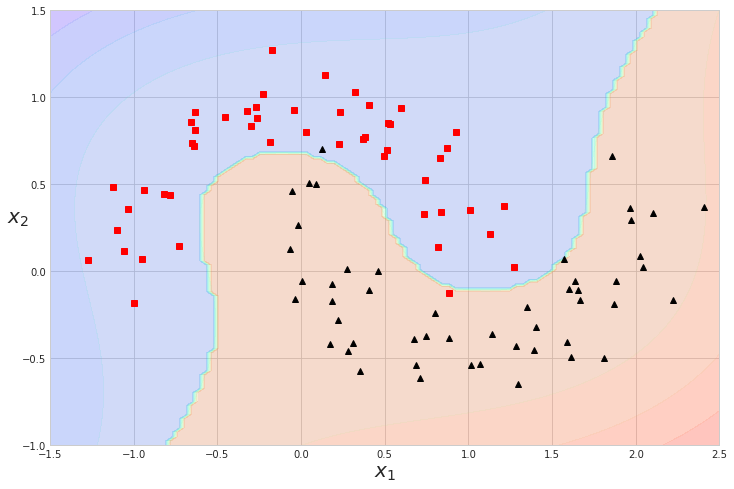

In [85]:
plt.figure(figsize=(12, 8))
SVMClf.plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
SVMClf.plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [40]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=5))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=5, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

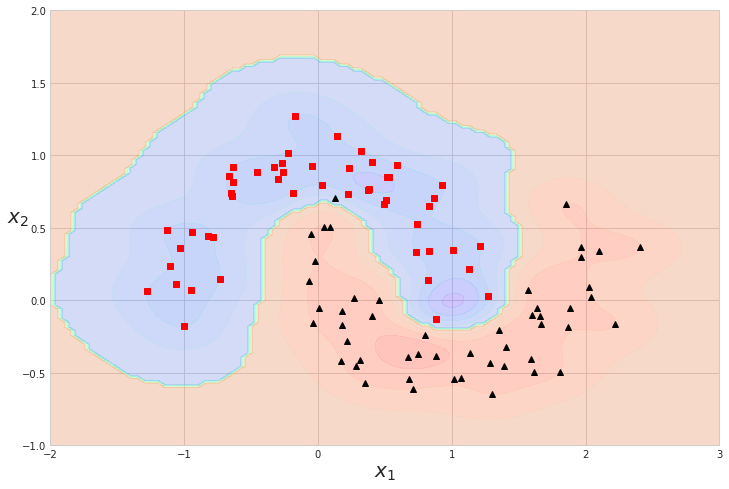

In [45]:
plt.figure(figsize=(12, 8))
SVMClf.plot_predictions(rbf_kernel_svm_clf, [-2, 3, -1, 2])
SVMClf.plot_dataset(X, y, [-2, 3, -1, 2])

Let's look at another example:

In [65]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

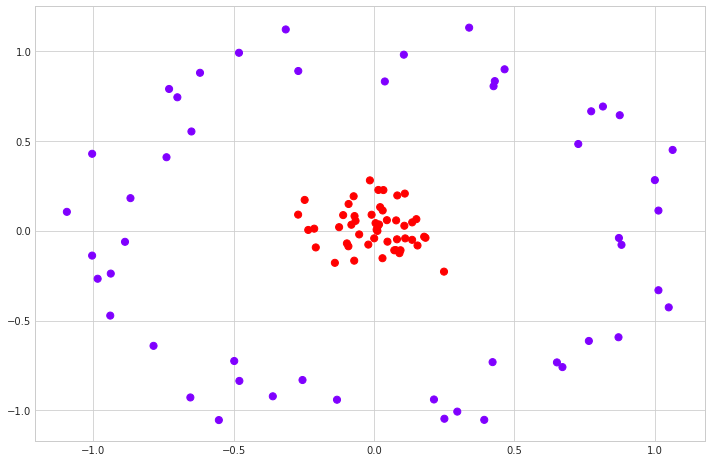

In [66]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [67]:
circle_linear_svm = SVMClf(X,y, kernel='linear', C=100)
circle_linear_svm.train_model()
circle_linear_svm.get_parameters()

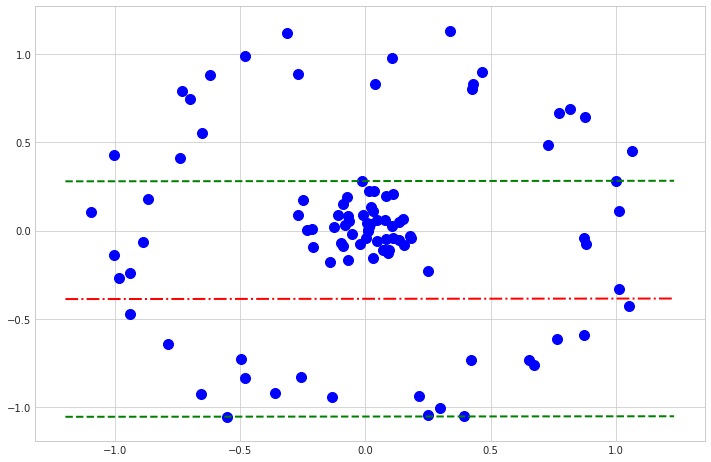

In [68]:
circle_linear_svm.plot_model_boundary()

In [71]:
circle_rbf_svm = SVC(kernel='rbf', C=1E6)
circle_rbf_svm.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

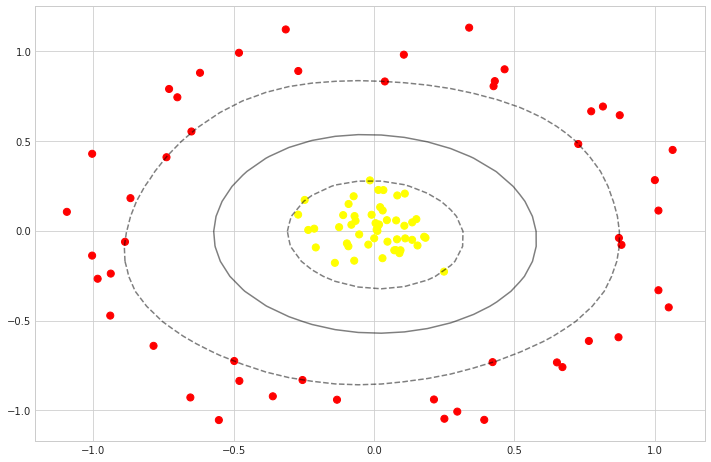

In [76]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
SVMClf.plot_svc_decision_function(circle_rbf_svm)
plt.scatter(circle_rbf_svm.support_vectors_[:, 0], circle_rbf_svm.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#### Computational Complexity:

*sklearn.svm.LinearSVC* is based on *liblinear* library, which does not support kernel tricks. It does not calculate support vector, also. The time complexity is roughly $O(m \times n)$ where $m$ is the number of instances and $n$ is the number of features. 

*sklearn.svm.SVC* is based on the *libsvm* library, which supports kernel tricks. The time complexity is roughtly between $O(m^2 \times n)$ to $O(m^3 \times n)$. So if we have larger number of instances, the algorithm would be extremely slow. This algorithm works perfectly for complex but small/medium sized training sets. However, it scales well with number of features.

### SVM Regression

As we have talked in linear model, classification and regression problems can be transferred from one to another easily, sometimes we only need to tune our model or theory slightly.

Similar here in Support Vector Machine, we can reverse our object: instead of trying to maximize the gap between two classes of data, we now need to fit as many instances as possible on the street while limiting the margin violations.

Mathematically, the problem can be stated as :
$$min_{w,b}\frac{1}{2}||w||^2 + C \sum_{i=1}^{m}l_{\epsilon}(f(x_i) - y_i)$$

Where $C$ is the regularization term, and $l_{\epsilon}$ is $\epsilon$-insensitive loss function.

$$l_{\epsilon}(x) = \left   \{
         \begin{array}{ll}
          0 & |x| \leq \epsilon\\
           |x| - \epsilon & otherwise
                \end{array}
              \right.$$
              

In [103]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [119]:

class   SVMRegression(object):

    def __init__(self, X, y, epsilon, **kwargs):

        self.X = X
        self.y = y
        self.epsilon = epsilon
        self.model = LinearSVR(epsilon=epsilon, **kwargs) 

    def train_model(self):
        self.model.fit(self.X, self.y)
        self.epsilon = self.model.epsilon
        self.y_pred = self.model.predict(self.X)

    def get_support_vectors(self):
        """
        Get the index of points which is off the street
        """
        self.if_off_margin = (np.abs(self.y - self.y_pred) >= self.epsilon)
        self.idx_support_ = np.argwhere(self.if_off_margin)
        return self.idx_support_

    def model_predict(self, x_new):
        return self.model.predict(x_new)

    def plot_svm_regression(self, axes):
        """
        Plot SVM Regression
        """
        x_new = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
        y_estimate = self.model.predict(x_new)

        plt.plot(x_new, y_estimate, "k-", linewidth=2, label="Prediction of y")
        plt.plot(x_new, y_estimate + self.epsilon, "r--", label="Upper Bound")
        plt.plot(x_new, y_estimate - self.epsilon, "g--", label="Lower Bound")
        
        plt.scatter(self.X[self.idx_support_], self.y[self.idx_support_], s=180, facecolors='#FFAAAA')
        plt.plot(self.X, self.y, "bo")
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$y$", fontsize=18, rotation=0)
        plt.legend(loc="best", fontsize=18)
        plt.axis(axes)





In [120]:
svmreg1 = SVMRegression(X=X,y=y,epsilon=1.5)
svmreg1.train_model()
svmreg1.get_support_vectors();

svmreg2 = SVMRegression(X=X,y=y,epsilon=0.5)
svmreg2.train_model()
svmreg2.get_support_vectors();



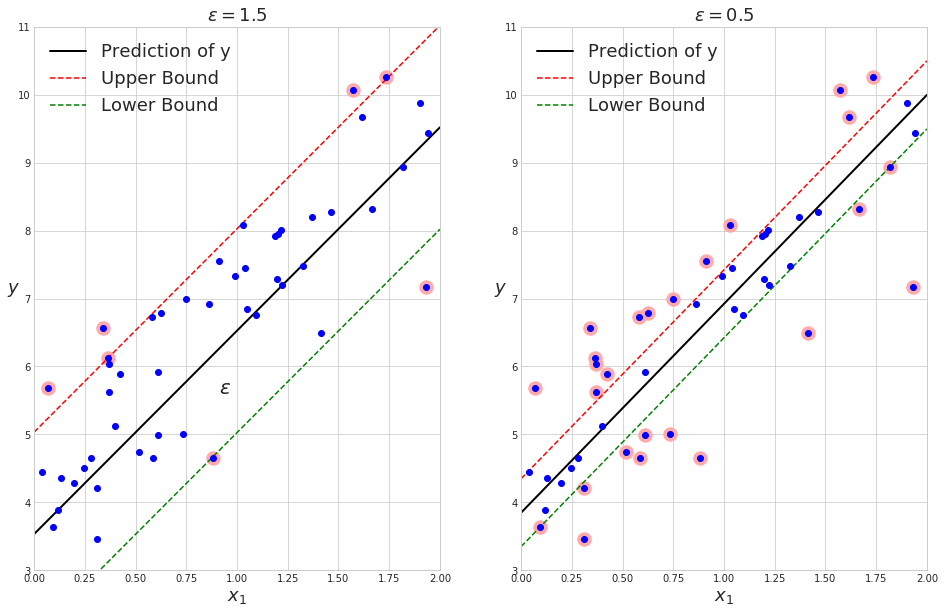

In [124]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
svmreg1.plot_svm_regression([0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svmreg1.epsilon), fontsize=18)

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
svmreg2.plot_svm_regression([0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()